### Простой анализ данных

#### Цель работы

Освоить основные приемы работы с библиотекой pandas для простого статистического анализа данных.

#### Задания для выполнения

Вам даны данные результатов ЕГЭ по различным предметам. Выполните следующие действия:

1. Загрузите данные по вариантам в ноутбук.
2. Сделайте описательную статистику полученных данных.
3. Найдите процент учащихся, выполнивших работу ниже среднего.
4. Найти процент учащихся не сдавших экзамен.
5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.
6. Постройте ядерную оценку плотности распределению баллов за экзамен. 
7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».
8. Какое процентное соотношение юношей и девушек писало данный экзамен? 
9. Сколько школ принимало участие в экзамене?
1. Сколько всего заданий с кратким ответом? С развернутым ответом?
2. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 
3. Аналогично и с типом С (ответы с развернутым ответом)
4. Сделайте анализ по двум школам:
    1. по всем выполненным заданиям типа В
    2. по заданиям типа С больше 50%
    3. по среднему баллу юношей и девушек
1. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

#### Загружаем данные в ноутбук. 

In [60]:
data = pd.read_excel('Вариант 2.xlsx',  engine='openpyxl', skiprows=2)
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
1,2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2,3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3,4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4,5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0


Проведем описательную статистику по полям таблицы:
1. Количество записей
2. Среднее значение в выборке
3. Стандартное отклонение (изменчивость данных в выборке)
4. Минимальное значение в выборке
5. Значение, ниже которого находится 25% данных в выборке
6. Значение, ниже которого находится 50% данных в выборке
7. Значение, ниже которого находится 75% данных в выборке
8. Максимальное значение в выборке

In [61]:
data.describe()

,№,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,2356.000000,2357.000000,2356.0
mean,1178.500000,132.005518,338.273769,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,3.820484,17.876625,0.0
min,1.000000,121.000000,101.000000,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,27.000000,96.000000,27.0


#### Процент учащихся, выполнивших работу ниже среднего.

In [3]:
mean_score = data['Балл'].mean()
mean_lower = (data['Балл'] < mean_score).sum()
(mean_lower / len(data)) * 100

47.984726347051335

In [4]:
min_score = 27
no_score = (data['Балл'] < min_score).sum()
(no_score / len(data)) * 100

9.20661858294442

#### Диаграмма сдавших/не сдавших экзамен

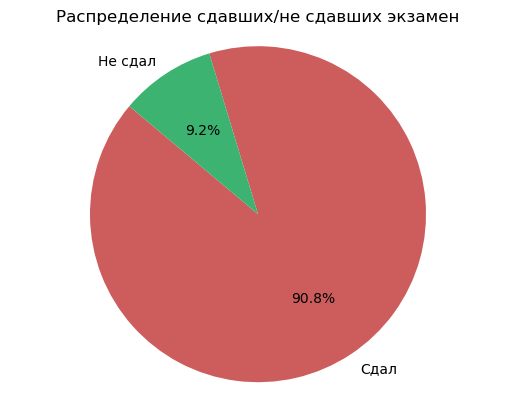

In [5]:
score = len(data) - no_score
labels = 'Сдал', 'Не сдал'
sizes = [score, no_score]
colors = ['IndianRed', 'MediumSeaGreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение сдавших/не сдавших экзамен')
plt.show()

#### Ядерная оценка плотности распределению баллов за экзамен

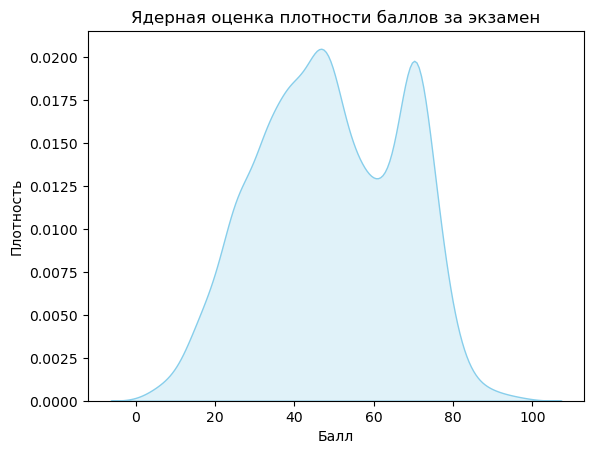

In [6]:
sns.kdeplot(data['Балл'], fill=True, color='skyblue')
plt.xlabel('Балл')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности баллов за экзамен')
plt.show()

#### Процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

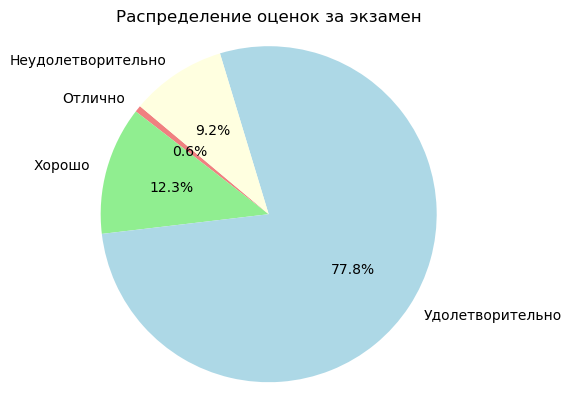

In [7]:
A_score = 85
B_score = 71
C_score = 27

A_students = (data[data['Балл'] >= A_score]['Балл'].count() / len(data)) * 100
B_students = (data[(data['Балл'] >= B_score) & (data['Балл'] < A_score)]['Балл'].count() / len(data)) * 100
C_students = (data[(data['Балл'] >= C_score) & (data['Балл'] < B_score)]['Балл'].count() / len(data)) * 100
D_students = (data[data['Балл'] < C_score]['Балл'].count() / len(data)) * 100

labels = 'Отлично', 'Хорошо', 'Удолетворительно', 'Неудолетворительно'
sizes = [A_students, B_students, C_students, D_students]
colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение оценок за экзамен')
plt.show()

#### Процентное соотношение юношей и девушек, сдававших экзамен

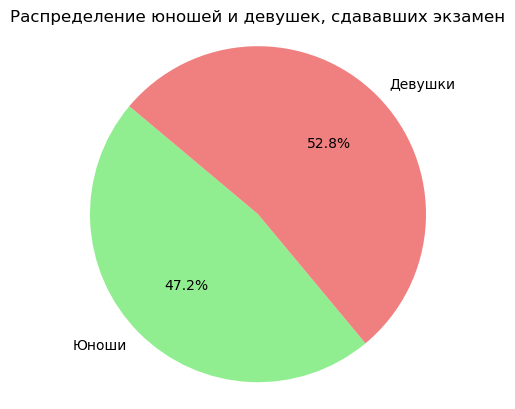

In [8]:
male = (data['Пол'] == 'М').sum()
female = (data['Пол'] == 'Ж').sum()

males = (male / len(data)) * 100
females = (female / len(data)) * 100

labels = 'Юноши', 'Девушки'
sizes = [males, females]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение юношей и девушек, сдававших экзамен')
plt.show()

#### Количество школ, принимавших участие в экзамене

In [9]:
data['№ школы'].nunique()

17

#### Количество заданий с кратким ответом

In [10]:
count_B = len(data.at[0, 'Задания с кратким ответом'])
count_B

12

#### Количество заданий с развернутым ответом

In [39]:
count_C = data.at[0, 'Задания с развёрнутым ответом'].count('0')
print(count_C)

7


#### Процент выполненных и невыполненных заданий по каждому вопросу класса В

In [12]:
def right_count(line):
    if isinstance(line, str):
        return line.count('+')
    return 0

In [88]:
def right_count_B(df):
    for i in range(12):
        df[f'B{i+1}'] = df['Задания с кратким ответом'].str[i].apply(lambda x: 1 if x == '+' else 0)
                       
    res = {}
    for i in range(12):
        done = df[f'B{i+1}'].sum()
        not_done = len(df) - done
        res[f'B{i+1}'] = {'done': done, 'not done': not_done}
    
    for i, val in res.items():
        done = val['done']
        not_done = val['not done']
        done_percent = (done / len(df)) * 100
        not_done_percent = (not_done / len(df)) * 100
        res[i]['done'] = round(done_percent, 2)
        res[i]['not done'] = round(not_done_percent, 2)
    
    return res

In [89]:
df = data
df['Правильные ответы B'] = df['Задания с кратким ответом'].apply(right_count)
    
res = right_count_B(df)
res

{'B1': {'done': 89.22, 'not done': 10.78},
 'B2': {'done': 95.29, 'not done': 4.71},
 'B3': {'done': 92.75, 'not done': 7.25},
 'B4': {'done': 90.96, 'not done': 9.04},
 'B5': {'done': 88.46, 'not done': 11.54},
 'B6': {'done': 73.14, 'not done': 26.86},
 'B7': {'done': 37.46, 'not done': 62.54},
 'B8': {'done': 47.82, 'not done': 52.18},
 'B9': {'done': 91.81, 'not done': 8.19},
 'B10': {'done': 71.45, 'not done': 28.55},
 'B11': {'done': 59.23, 'not done': 40.77},
 'B12': {'done': 46.2, 'not done': 53.8}}

#### Процент выполненных и невыполненных заданий по каждому вопросу класса C

In [164]:
stat = np.zeros(df.iloc[0].count('('), dtype=int)
task_num = 0
for i in range(0, df.count()):
    task = df.iloc[i]
    for j in range(0, len(task)):
        if (j != len(task)-1):
            if (task[j+1] == '('):
                if task[j] != '0':
                    # балл за задачу > 0 -- выполнено
                    stat[task_num] += 1    
                task_num += 1
        else:
            continue
    task_num = 0

res_yes = np.zeros(df.iloc[0].count('('))
for i in range(0, len(stat)):
    percent = stat[i]/len(data)
    res_yes[i] = round(percent, 2)
    
res_no = [1]*len(res)
for i in range(len(res_yes)):
    res_no[i] = round(res_no[i] - res_yes[i], 2)

In [165]:
df = data["Задания с развёрнутым ответом"]
stat = right_count_C(df)

stat

array([799, 374, 367,  64,  80,  26,  80])

Процент выполненных и невыполненных заданий С соответственно:

In [41]:
res_C = {}
for i in range(len(res_yes)):
    res_C[f'C{i+1}'] = {'done': res_yes[i], 'not done': res_no[i]}
    
res_C

{'C1': {'done': 0.34, 'not done': 0.66},
 'C2': {'done': 0.16, 'not done': 0.84},
 'C3': {'done': 0.16, 'not done': 0.84},
 'C4': {'done': 0.03, 'not done': 0.97},
 'C5': {'done': 0.03, 'not done': 0.97},
 'C6': {'done': 0.01, 'not done': 0.99},
 'C7': {'done': 0.03, 'not done': 0.97}}

#### Проанализируем все выполненные задания класса В для всех школ

In [90]:
data_B = {
    'Task': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12'],
    'Done (%)': [89.22, 95.29, 92.74, 90.96, 88.46, 73.14, 37.46, 47.82, 91.81, 71.45, 59.23, 46.20]
}
df = pd.DataFrame(data_B)
df

,Task,Done (%)
0,B1,89.22
1,B2,95.29
2,B3,92.74
3,B4,90.96
4,B5,88.46
5,B6,73.14
6,B7,37.46
7,B8,47.82
8,B9,91.81
9,B10,71.45


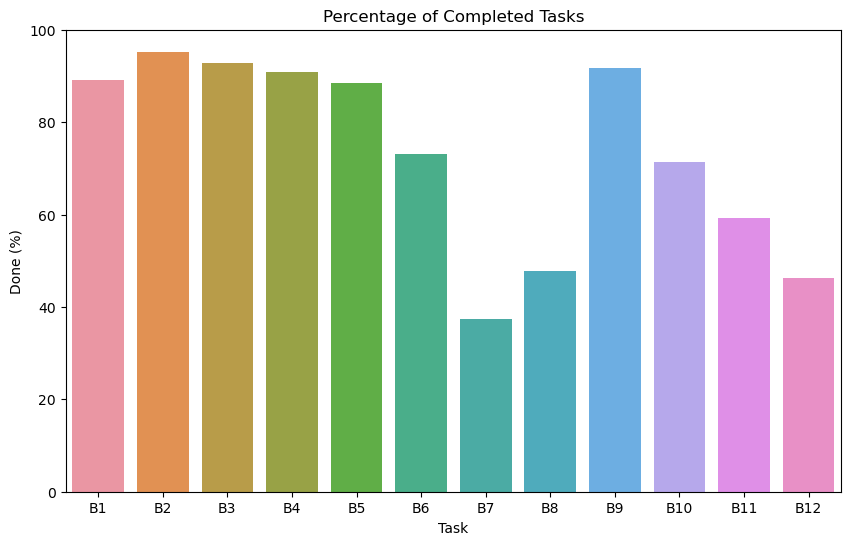

In [87]:
def plot_B(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Task', y='Done (%)', data=df)
    plt.xlabel('Task')
    plt.ylabel('Done (%)')
    plt.title('Percentage of Completed Tasks')
    plt.show()
    
plot_B(df)

In [24]:
mean_done = round(df['Done (%)'].mean(), 2)
median_done = round(df['Done (%)'].median(), 2)
std_done = round(df['Done (%)'].std(), 2)

print(f"Mean: {mean_done}%")
print(f"Median: {median_done}%")
print(f"Standard Deviation: {std_done}")

Mean: 73.65%
Median: 80.8%
Standard Deviation: 21.04


#### Проанализируем задания типа С,  не выполненные больше чем на 50%

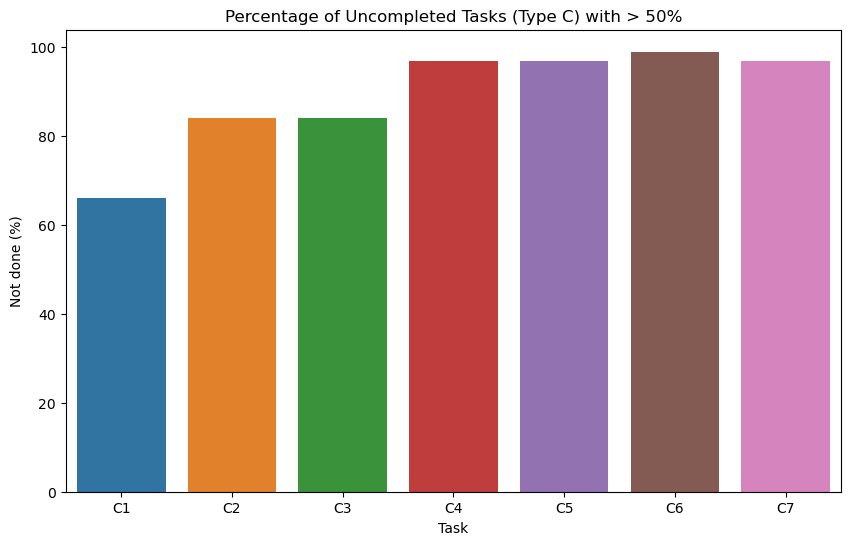

In [68]:
df_C = pd.DataFrame.from_dict(res_C, orient='index')
df_C.index.name = 'Task'
df_C.reset_index(inplace=True)
df_C['Not done (%)'] = df_C['not done'] * 100
df_C_filtered = df_C[df_C['Not done (%)'] > 50]

plt.figure(figsize=(10, 6))
sns.barplot(x='Task', y='Not done (%)', data=df_C_filtered)
plt.xlabel('Task')
plt.ylabel('Not done (%)')
plt.title('Percentage of Uncompleted Tasks (Type C) with > 50%')
plt.show()

#### Проанализируем все выполненные задания класса В для двух школ с наибольшим количеством обучающихся

In [78]:
value_counts = data['№ школы'].value_counts()
top_schools = value_counts.head(2).index.tolist()
top_schools = [int(value) for value in top_schools]
top_schools

[136, 135]

In [102]:
selected_school_df1 = data[data['№ школы'] == 136]
df1 = selected_school_df1.copy()
df1['Правильные ответы B'] = df1['Задания с кратким ответом'].apply(right_count)
res1 = right_count_B(df1)

selected_school_df2 = data[data['№ школы'] == 135]
df2 = selected_school_df2.copy()
df2['Правильные ответы B'] = df2['Задания с кратким ответом'].apply(right_count)
res2 = right_count_B(df2)
    
print ('Для школы № 136')
print(res1)
print ('Для школы № 135')
print(res2)

Для школы № 136
{'B1': {'done': 90.29, 'not done': 9.71}, 'B2': {'done': 96.47, 'not done': 3.53}, 'B3': {'done': 94.71, 'not done': 5.29}, 'B4': {'done': 91.08, 'not done': 8.92}, 'B5': {'done': 90.49, 'not done': 9.51}, 'B6': {'done': 74.61, 'not done': 25.39}, 'B7': {'done': 42.16, 'not done': 57.84}, 'B8': {'done': 47.94, 'not done': 52.06}, 'B9': {'done': 91.08, 'not done': 8.92}, 'B10': {'done': 73.04, 'not done': 26.96}, 'B11': {'done': 61.18, 'not done': 38.82}, 'B12': {'done': 48.53, 'not done': 51.47}}
Для школы № 135
{'B1': {'done': 88.46, 'not done': 11.54}, 'B2': {'done': 96.15, 'not done': 3.85}, 'B3': {'done': 91.76, 'not done': 8.24}, 'B4': {'done': 85.71, 'not done': 14.29}, 'B5': {'done': 91.76, 'not done': 8.24}, 'B6': {'done': 71.98, 'not done': 28.02}, 'B7': {'done': 39.01, 'not done': 60.99}, 'B8': {'done': 43.96, 'not done': 56.04}, 'B9': {'done': 89.56, 'not done': 10.44}, 'B10': {'done': 72.53, 'not done': 27.47}, 'B11': {'done': 54.95, 'not done': 45.05}, 'B12

In [106]:
data_136 = {
    'Task': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12'],
    'Done (%)': [90.29, 96.47, 94.71, 91.08, 90.49, 74.61, 42.16, 47.94, 91.08, 73.04, 61.18, 48.53]
}
data_135 = {
    'Task': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12'],
    'Done (%)': [88.46, 96.15, 91.76, 85.71, 91.76, 71.98, 39.01, 43.96, 89.56, 72.53, 54.95, 42.86]
}
df_136 = pd.DataFrame(data_136)
df_135 = pd.DataFrame(data_135)
df_combined = pd.merge(df_136, df_135, on='Task', suffixes=('_136', '_135'))

df_combined['Difference'] = df_combined['Done (%)_136'] - df_combined['Done (%)_135']

print('Разница в процентах выполнения заданий')
df_combined

Разница в процентах выполнения заданий


,Task,Done (%)_136,Done (%)_135,Difference
0,B1,90.29,88.46,1.83
1,B2,96.47,96.15,0.32
2,B3,94.71,91.76,2.95
3,B4,91.08,85.71,5.37
4,B5,90.49,91.76,-1.27
5,B6,74.61,71.98,2.63
6,B7,42.16,39.01,3.15
7,B8,47.94,43.96,3.98
8,B9,91.08,89.56,1.52
9,B10,73.04,72.53,0.51


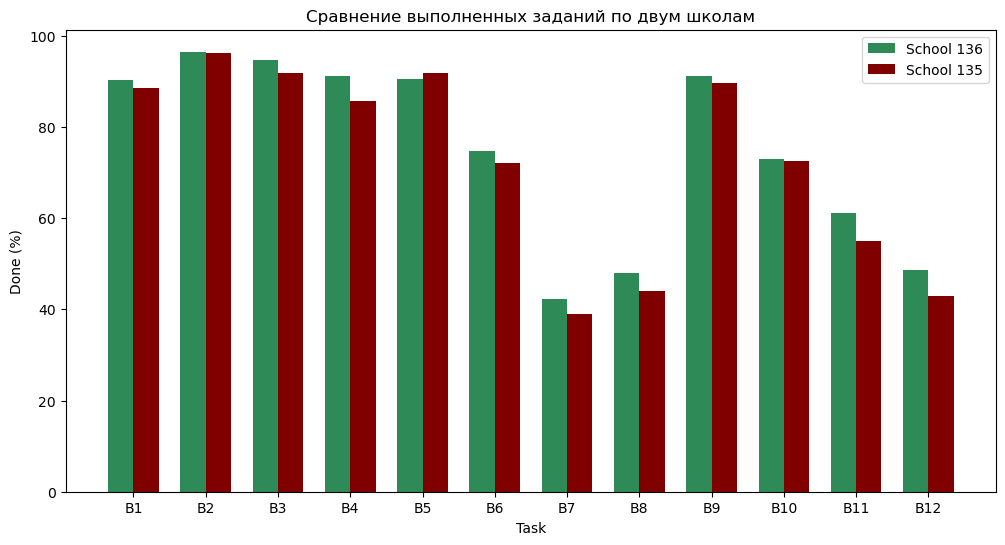

In [120]:
x = np.arange(len(df_combined))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, df_combined['Done (%)_136'], width, label='School 136', color='seagreen')
bar2 = ax.bar(x + width/2, df_combined['Done (%)_135'], width, label='School 135', color='maroon')

ax.set_xlabel('Task')
ax.set_ylabel('Done (%)')
ax.set_title('Сравнение выполненных заданий по двум школам')
ax.set_xticks(x)
ax.set_xticklabels(df_combined['Task'])
ax.legend()

plt.show()

#### Проанализируем задания класса C больше 50% для двух школ с наибольшим количеством обучающихся

In [166]:
def right_count_C_Series(df):
    stat = np.zeros(df.iloc[0].count('('), dtype=int)
    task_num = 0
    for i in range(0, df.count()):
        task = df.iloc[i]
        for j in range(0, len(task)):
            if (j != len(task)-1):
                if (task[j+1] == '('):
                    if task[j] != '0':
                        # балл за задачу > 0 -- выполнено
                        stat[task_num] += 1    
                    task_num += 1
            else:
                continue
        task_num = 0

    res_yes = np.zeros(df.iloc[0].count('('))
    for i in range(0, len(stat)):
        percent = stat[i]/len(data)
        res_yes[i] = round(percent, 2)
    
    res_no = [1]*len(res)
    for i in range(len(res_yes)):
        res_no[i] = round(res_no[i] - res_yes[i], 2)
    
    return stat, res_yes, res_no

In [167]:
selected_school_df1 = data[data['№ школы'] == 136]
df1 = selected_school_df1.copy()
df1 = df1['Задания с развёрнутым ответом']
stat1, yes1, no1 = right_count_C_Series(df1)

selected_school_df2 = data[data['№ школы'] == 135]
df2 = selected_school_df2.copy()
df2 = df2['Задания с развёрнутым ответом']
stat2, yes2, no2 = right_count_C_Series(df2)

stat1, stat2

(array([416, 217, 207,  46,  60,  18,  56]),
 array([61, 24, 17,  4,  4,  1,  6]))

In [170]:
res_C1, res_C2 = {}, {}

for i in range(len(yes1)):
    res_C1[f'C{i+1}'] = {'done': yes1[i], 'not done': no1[i]}
for i in range(len(yes2)):
    res_C2[f'C{i+1}'] = {'done': yes2[i], 'not done': no2[i]}

res_C1, res_C2

({'C1': {'done': 0.18, 'not done': 0.82},
  'C2': {'done': 0.09, 'not done': 0.91},
  'C3': {'done': 0.09, 'not done': 0.91},
  'C4': {'done': 0.02, 'not done': 0.98},
  'C5': {'done': 0.03, 'not done': 0.97},
  'C6': {'done': 0.01, 'not done': 0.99},
  'C7': {'done': 0.02, 'not done': 0.98}},
 {'C1': {'done': 0.03, 'not done': 0.97},
  'C2': {'done': 0.01, 'not done': 0.99},
  'C3': {'done': 0.01, 'not done': 0.99},
  'C4': {'done': 0.0, 'not done': 1.0},
  'C5': {'done': 0.0, 'not done': 1.0},
  'C6': {'done': 0.0, 'not done': 1.0},
  'C7': {'done': 0.0, 'not done': 1.0}})

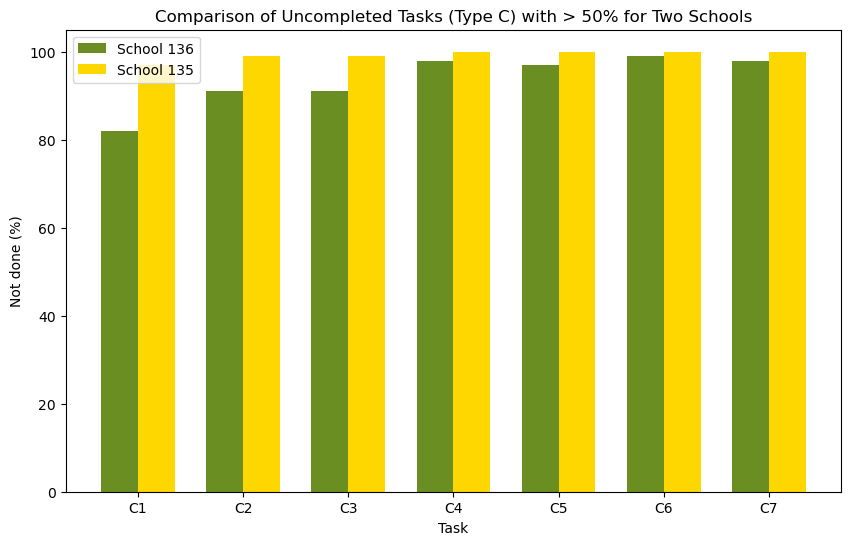

In [173]:
df_C1 = pd.DataFrame.from_dict(res_C1, orient='index')
df_C1.index.name = 'Task'
df_C1.reset_index(inplace=True)
df_C1['Not done (%)'] = df_C1['not done'] * 100
df_C1_filtered = df_C1[df_C1['Not done (%)'] > 50]

df_C2 = pd.DataFrame.from_dict(res_C2, orient='index')
df_C2.index.name = 'Task'
df_C2.reset_index(inplace=True)
df_C2['Not done (%)'] = df_C2['not done'] * 100
df_C2_filtered = df_C2[df_C2['Not done (%)'] > 50]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_C1))

plt.bar(index, df_C1['Not done (%)'], bar_width, color='olivedrab', label='School 136')
plt.bar(index + bar_width, df_C2['Not done (%)'], bar_width, color='gold', label='School 135')


plt.xlabel('Task')
plt.ylabel('Not done (%)')
plt.title('Comparison of Uncompleted Tasks (Type C) with > 50% for Two Schools')
plt.xticks(index + bar_width / 2, df_C1['Task']) 
plt.legend()

plt.show()

#### Проанализируем средний балл юношей и девушек для двух школ с наибольшим количеством обучающихся

In [181]:
selected_school_df1 = data[data['№ школы'] == 136][['Пол', 'Балл']]
df1 = selected_school_df1.copy()
selected_school_df2 = data[data['№ школы'] == 135][['Пол', 'Балл']]
df2 = selected_school_df2.copy()

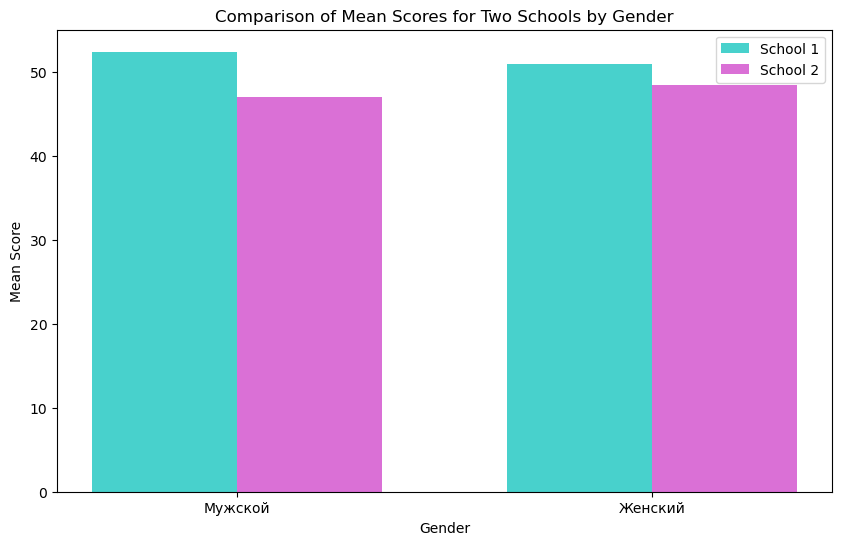

In [192]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

mean_scores_school1 = [df1[df1['Пол'] == 'М']['Балл'].mean(),
                       df1[df1['Пол'] == 'Ж']['Балл'].mean()]
plt.bar(index, mean_scores_school1, bar_width, color='mediumturquoise', label='School 1')

mean_scores_school2 = [df2[df2['Пол'] == 'М']['Балл'].mean(),
                       df2[df2['Пол'] == 'Ж']['Балл'].mean()]
plt.bar(index + bar_width, mean_scores_school2, bar_width, color='orchid', label='School 2')

plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Comparison of Mean Scores for Two Schools by Gender')
plt.xticks(index + bar_width / 2, ['Мужской', 'Женский'])  
plt.legend()

plt.show()